In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
features = pd.read_csv("C:/Users/mandujoayo/인공지능개론/과제/baseball position/baseball_players.csv", index_col = 0)

In [3]:
features

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [4]:
features.describe()

,Height(inches),Weight(pounds),Age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, Adam_Donachie to Josh_Kinney
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            1034 non-null   object 
 1   Position        1034 non-null   object 
 2   Height(inches)  1034 non-null   int64  
 3   Weight(pounds)  1033 non-null   float64
 4   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 48.5+ KB


In [6]:
features.columns

Index(['Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

<AxesSubplot:xlabel='Position', ylabel='count'>

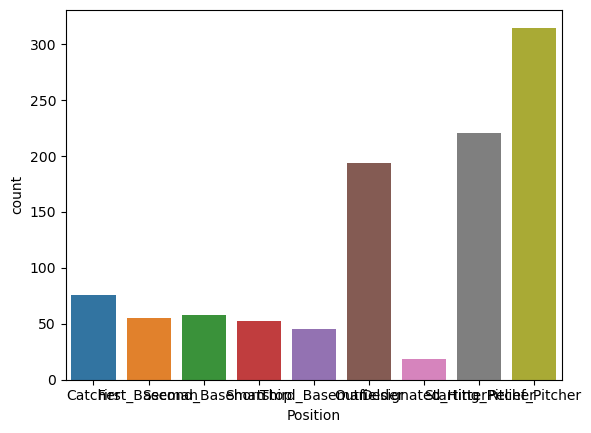

In [7]:
sns.countplot(data = features, x="Position")

<AxesSubplot:xlabel='Position', ylabel='Age'>

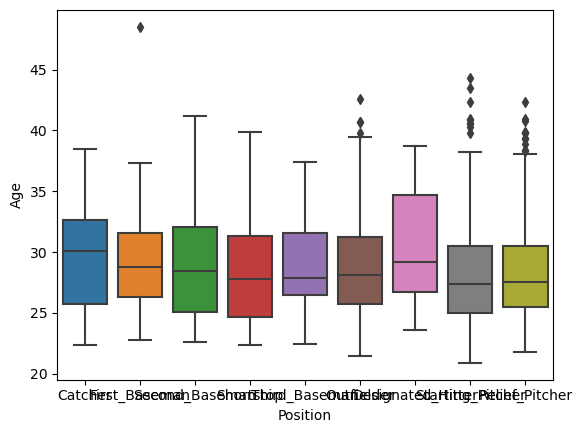

In [8]:
sns.boxplot(data = features, x="Position", y='Age')

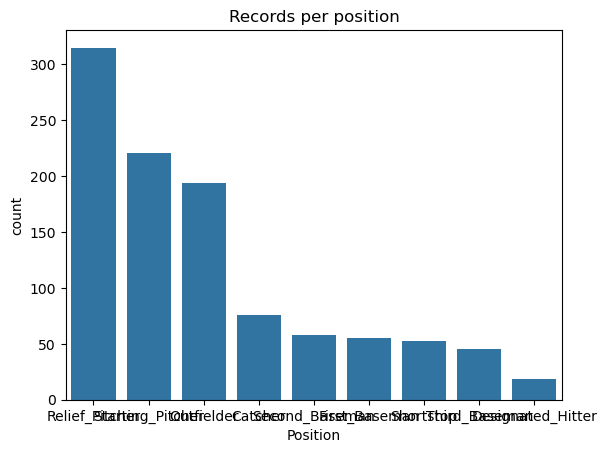

In [9]:
sns.countplot(x = "Position", data = features, palette = [sns.color_palette()[0]],

              order = features.Position.value_counts().index)

plt.title("Records per position");

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in features.columns:
    features[i] = le.fit_transform(features[i])

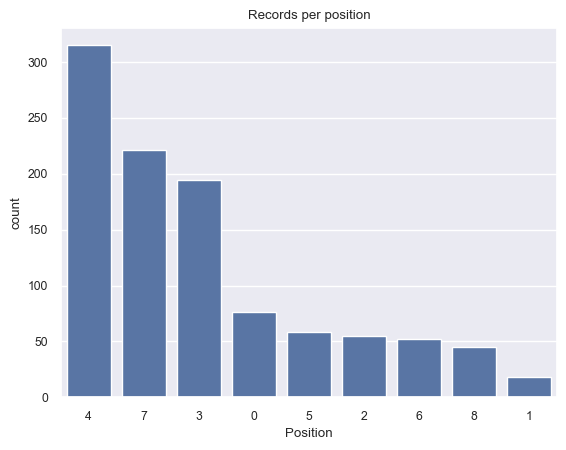

In [17]:
sns.countplot(x = "Position", data = features, palette = [sns.color_palette()[0]],

              order = features.Position.value_counts().index)

plt.title("Records per position");

In [11]:
features

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,3,0,7,15,35
Paul_Bako,3,0,7,50,625
Ramon_Hernandez,3,0,5,45,482
Kevin_Millar,3,2,5,45,645
Chris_Gomez,3,2,6,23,653
...,...,...,...,...,...
Brad_Thompson,25,4,6,25,145
Tyler_Johnson,25,4,7,15,190
Chris_Narveson,25,4,8,40,153


<AxesSubplot:xlabel='Position', ylabel='count'>

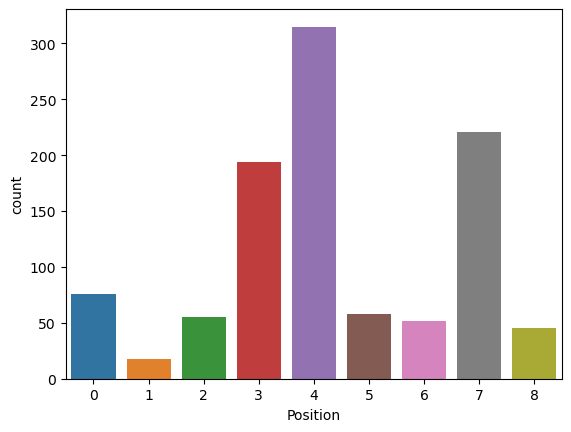

In [12]:
sns.countplot(data = features, x="Position")

<AxesSubplot:xlabel='Position', ylabel='Age'>

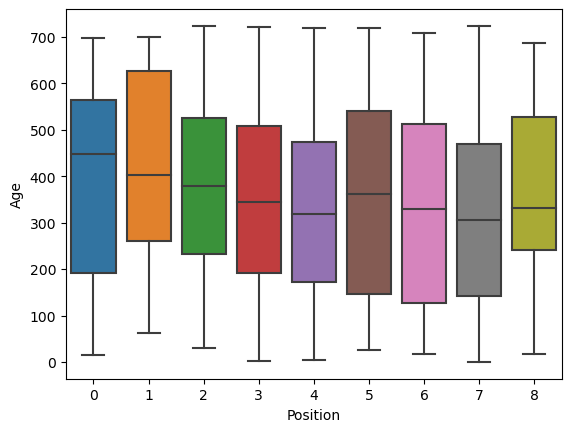

In [13]:
sns.boxplot(data = features, x="Position", y='Age')

In [14]:
df_corr = features.corr()

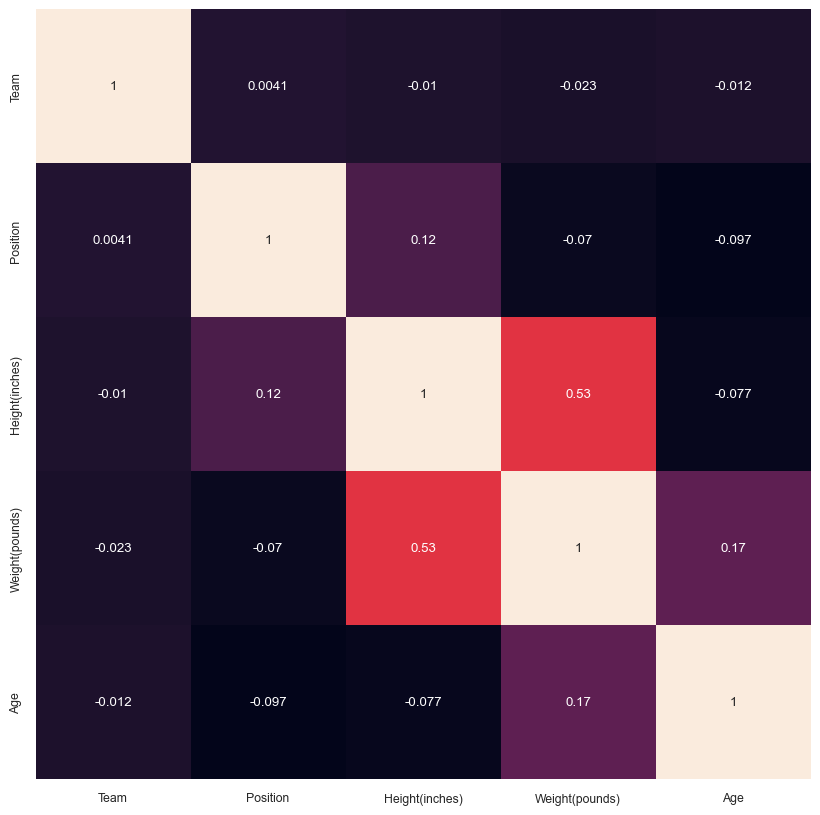

In [15]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
from sklearn.model_selection import train_test_split

X=features.drop('Position',axis=1)
y=features['Position']
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(827, 4) (827,)
(207, 4) (207,)


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [ 0.   0.2 -0.  -0. ]
상수항(절편): 3.9


In [25]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(827, 4) (207, 4)


In [26]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 4.352, RMSE: 2.086
Variance score : 0.060


In [27]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 3.883444760375581
회귀계수: [ 0.   0.2 -0.  -0. ]


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.0861805144117933


In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.9951651862215587


In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1426657287409


In [32]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.152098066296358
